In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM , Embedding , Flatten , Dense
from keras.regularizers import L2
from sklearn.metrics import r2_score , mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Mahesh\FERGUSSON\SEM 3\DEEP LEARNING\Datasets\Dataset monthly beer production (Time Series).csv")

In [3]:
df.head(5)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


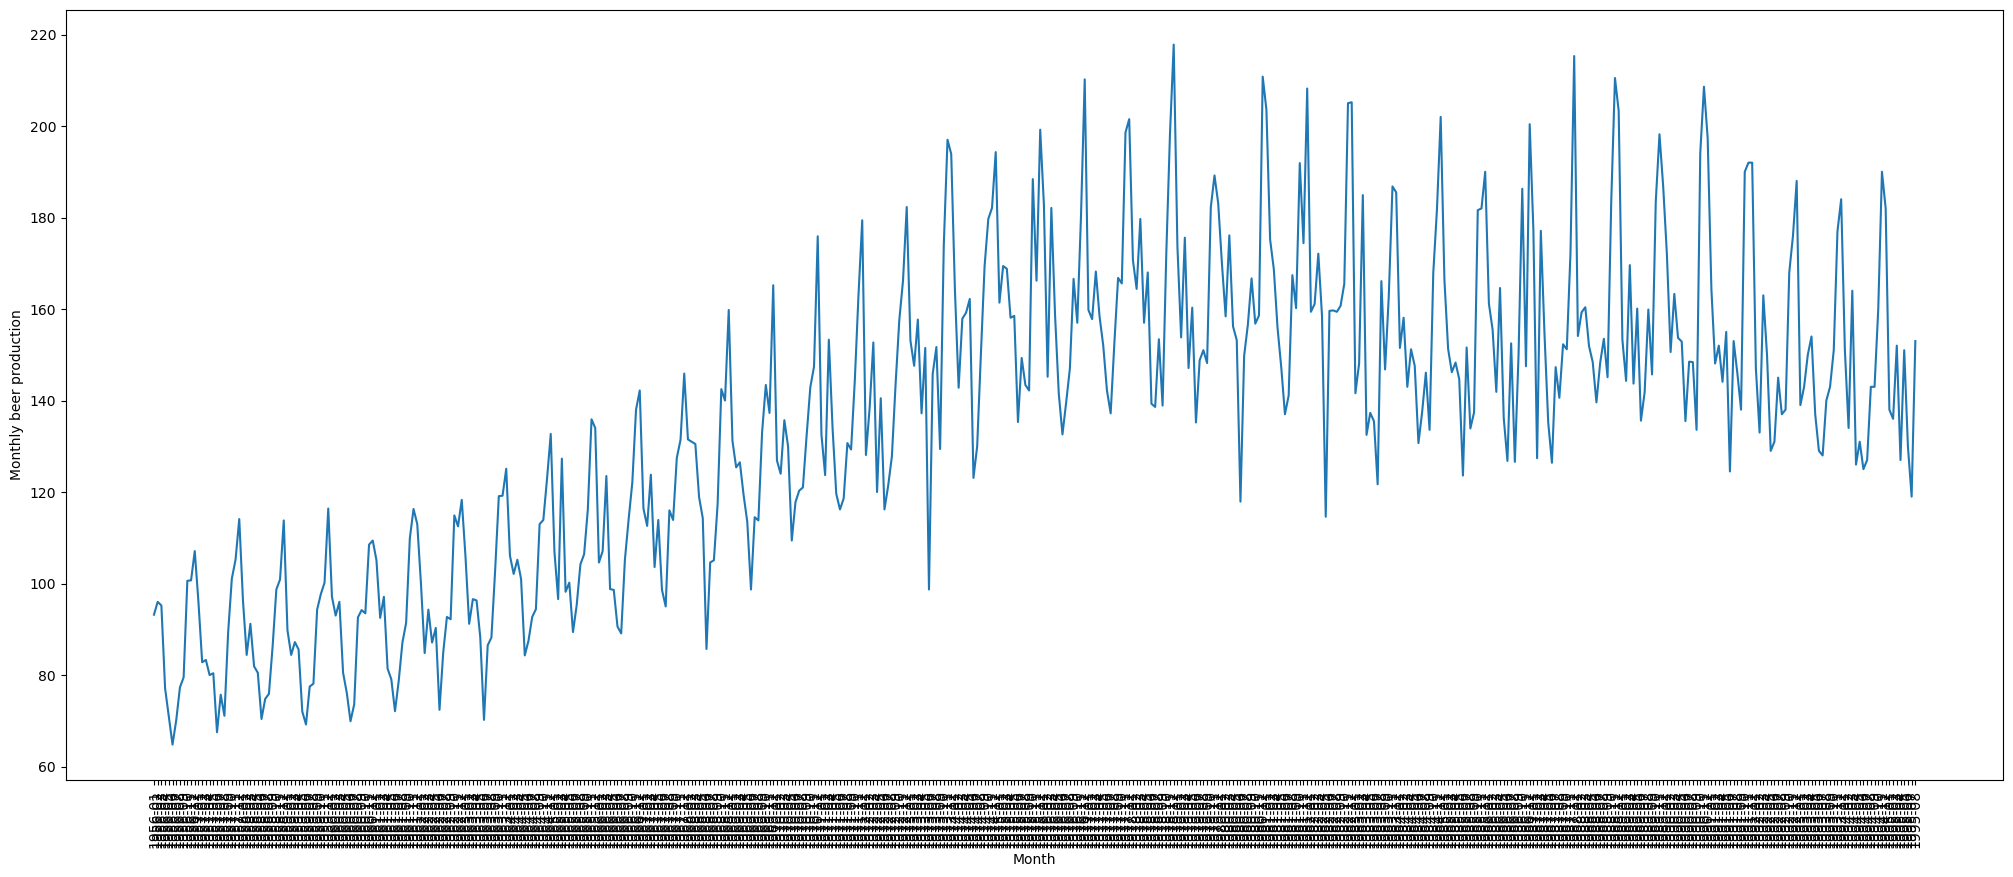

In [4]:
plt.figure(figsize= (25,10))
sns.lineplot(data = df , y = "Monthly beer production" , x = 'Month'  )
plt.xticks(rotation = 90)
plt.show()

In [5]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

# Making time series data

In [6]:
IP,OP = [] , [] 

for i in range(0,len(df)-1):
    IP.append(df['Monthly beer production'][i])
    OP.append(df['Monthly beer production'][i+1])
    
print(IP[0:4],OP[0:3])
print(len(IP),len(OP))

[93.2, 96.0, 95.2, 77.1] [96.0, 95.2, 77.1]
475 475


# Splitting into train and test , train = 70% and test = 30%

In [7]:
int((len(df)/100)*70)

333

ie 333 records for training and rest for testing

In [8]:
X_train = np.array(IP[0:333])
X_test = np.array(IP[333:])
y_train = np.array(OP[:333])
y_test = np.array(OP[333:])

In [9]:
X_train[0:3],y_train[0:3]

(array([93.2, 96. , 95.2]), array([96. , 95.2, 77.1]))

In [10]:
len(X_train)

333

# Reshaping arrays 

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows

In [11]:
X_train = np.reshape(X_train , (X_train.shape[0],1,1))
X_train.shape

(333, 1, 1)

In [12]:
X_test = np.reshape(X_test, (X_test.shape[0],1,1))
X_test.shape

(142, 1, 1)

In [13]:
X_train[:3]

array([[[93.2]],

       [[96. ]],

       [[95.2]]])

# LSTM network

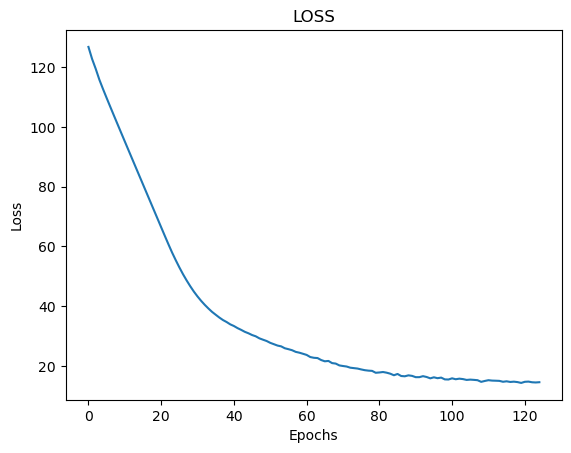

In [14]:
model_1 = Sequential()
model_1.add(LSTM(10 , activation='tanh' , input_shape = (1,1) , kernel_regularizer= L2(0.0001) ))
model_1.add(Dense(1))

            
            
            
model_1.compile(loss ='mae' , optimizer = 'adam' )


history = model_1.fit(X_train , y_train , batch_size = 1 , epochs=125 , verbose = 1 )


plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()




In [16]:
y_pred = model_1.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [17]:
rmse = (mean_squared_error(y_test , y_pred))**0.5
print("Root Mean Squared Error : " , rmse )

Root Mean Squared Error :  20.198763841787684


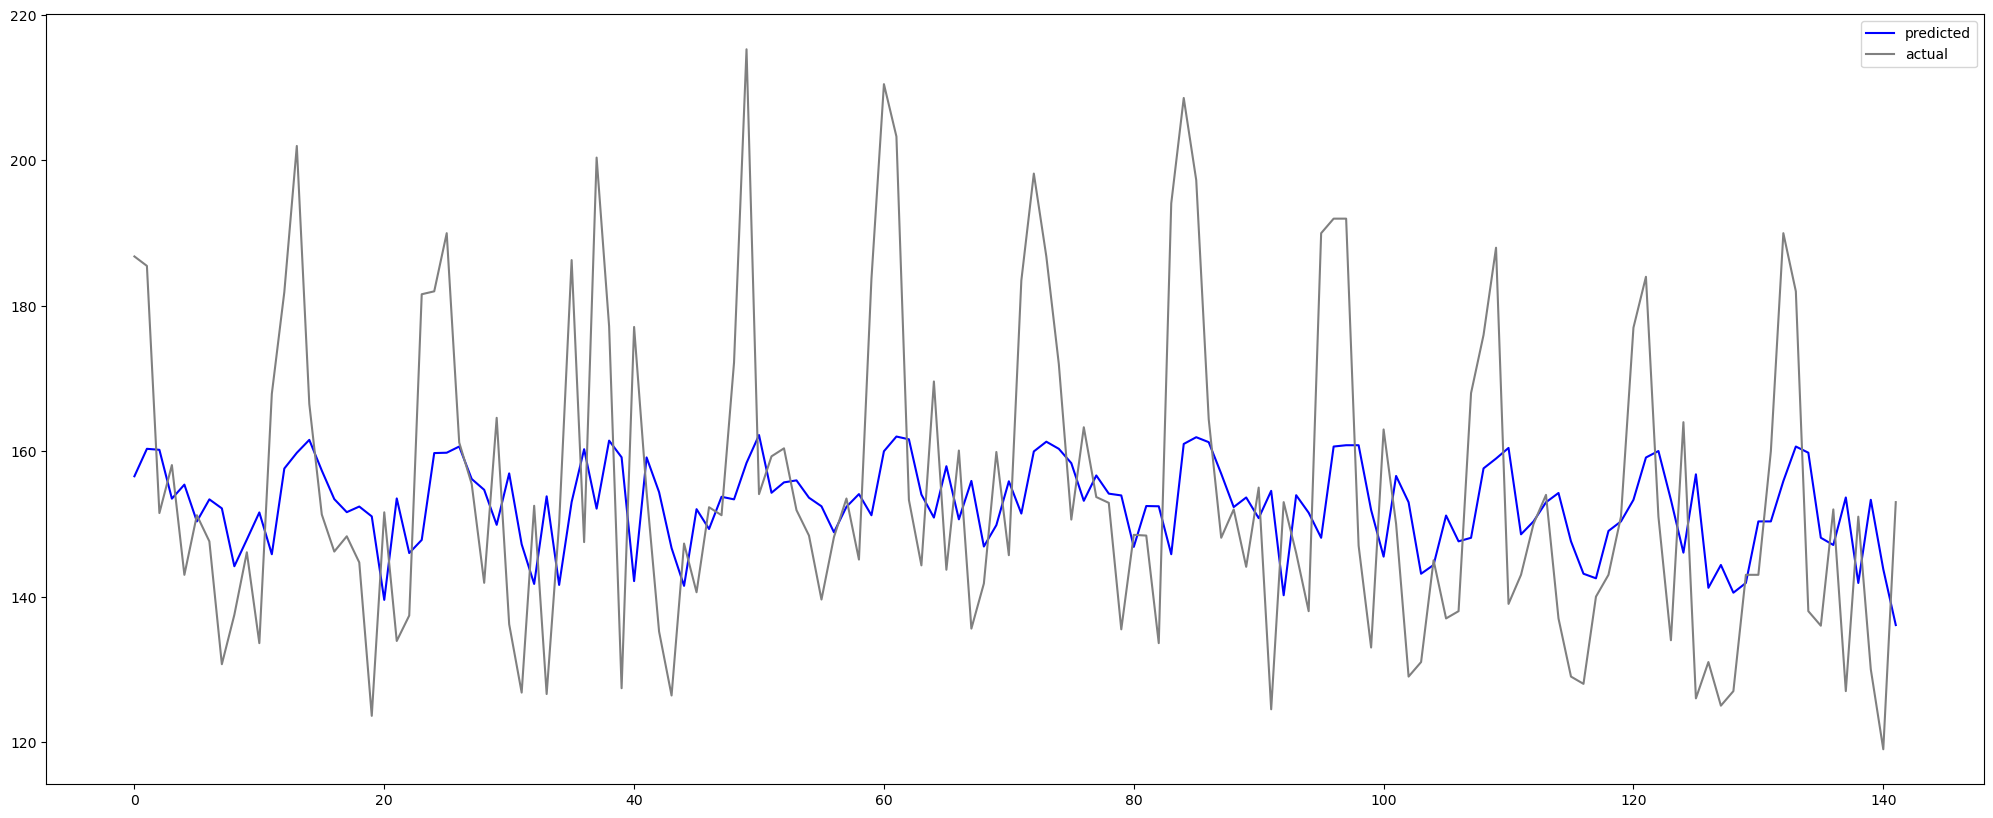

In [18]:
plt.figure(figsize=(25,10))
plt.plot(y_pred , color = 'blue')
plt.plot(y_test , color = 'grey')
plt.legend(labels = ['predicted' , 'actual'])
plt.show()

# Full Predictions

In [19]:
train_pred = model_1.predict(X_train)
test_pred = model_1.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [20]:
predictions = []
for i in train_pred:
    predictions.append(i[0])
    
for i in test_pred:
    predictions.append(i[0])

In [21]:
len(predictions)

475

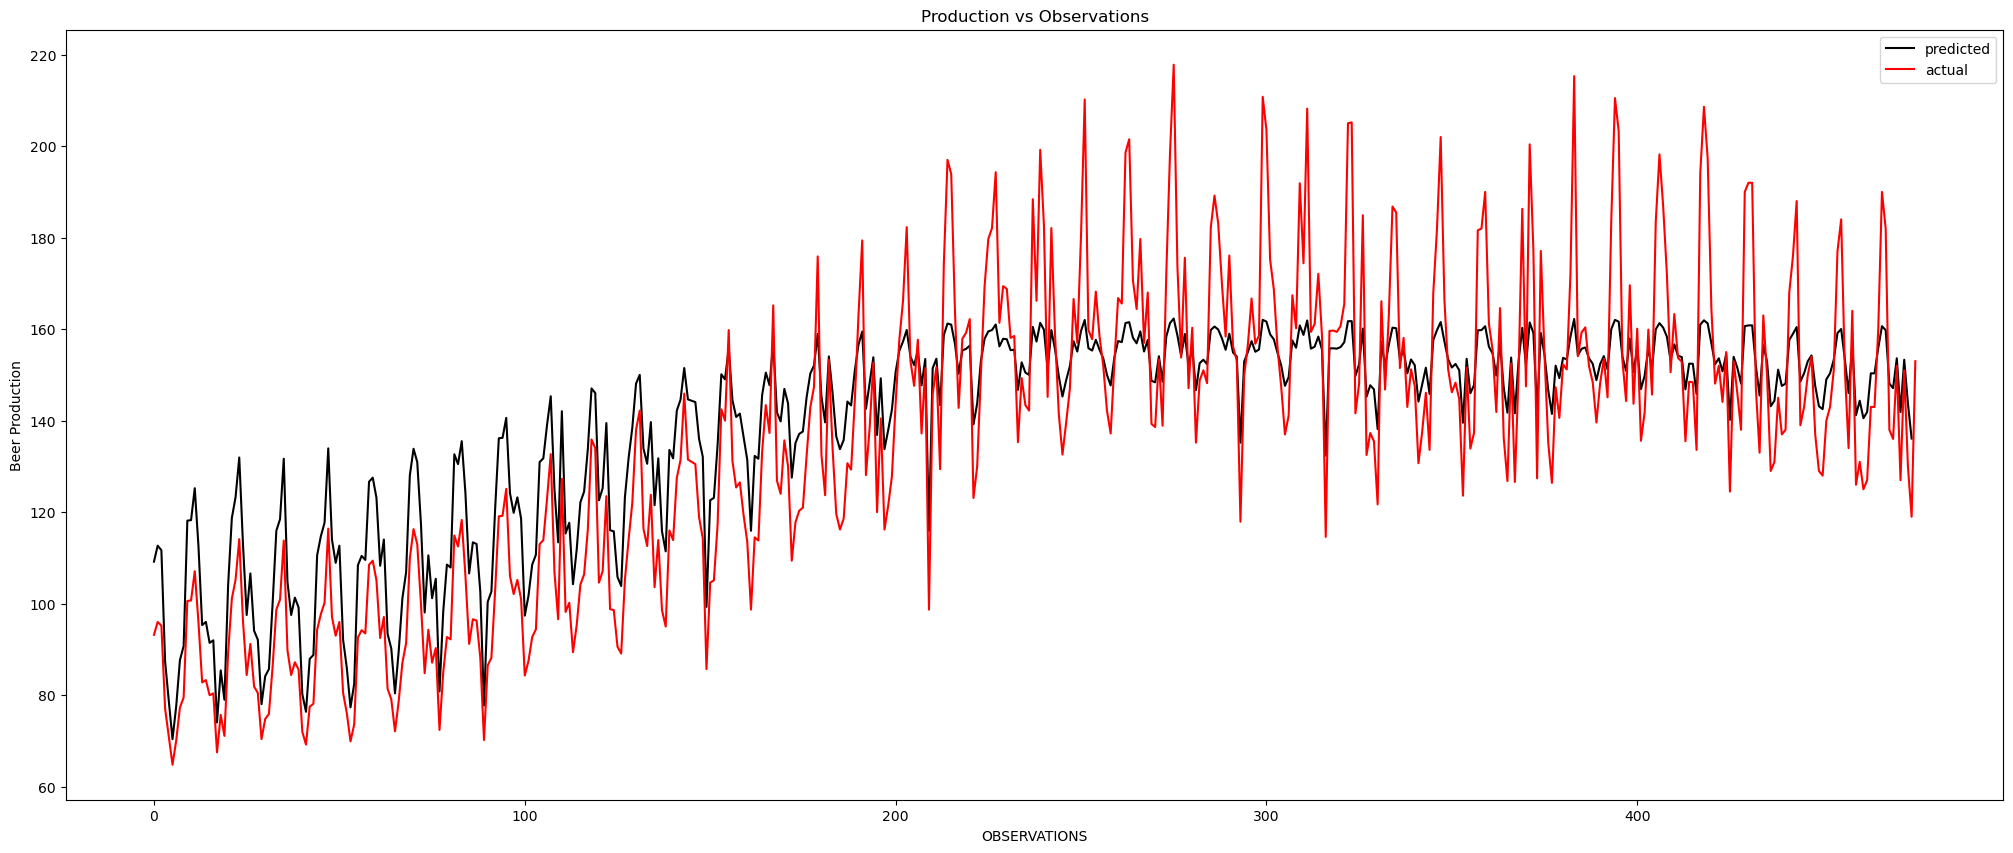

In [26]:
plt.figure(figsize=(25,10))
plt.plot(predictions, color = 'black')
plt.plot(df['Monthly beer production'] , color ='red')
plt.xlabel("OBSERVATIONS")
plt.ylabel("Beer Production")
plt.title("Production vs Observations")
plt.legend(labels = ['predicted' , 'actual'])
plt.show()